# Importing the Libraries

In [1]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# Getting and loading the Training, Testing and Validation set

In [2]:
train_path = r"C:\AI-DocHelper_Models_Code\Pneumonia_Detection\dataset\train"
validation_path = r"C:\AI-DocHelper_Models_Code\Pneumonia_Detection\dataset\val"
test_path = r"C:\AI-DocHelper_Models_Code\Pneumonia_Detection\dataset\test"

In [3]:
batch_size = 16
img_size = (256, 256)

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40.,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(train_path,
                                                   target_size = img_size,
                                                   batch_size = batch_size,
                                                    color_mode = "grayscale",
                                                   class_mode = "binary")

validation_generator = validation_datagen.flow_from_directory(validation_path,
                                                             target_size = img_size,
                                                             batch_size = batch_size,
                                                              color_mode = "grayscale",
                                                             class_mode = "binary")

test_generator = validation_datagen.flow_from_directory(test_path,
                                                       target_size = img_size,
                                                       batch_size = batch_size,
                                                       color_mode = "grayscale",
                                                       class_mode = "binary",
                                                       shuffle = False)

Found 4192 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Getting the class names

In [6]:
temp_classes = dict(train_generator.class_indices)

classes = dict()
for (k, v) in temp_classes.items() :
    classes[v] = k
print(classes)

{0: 'normal', 1: 'opacity'}


# Building the CNN

## Initalising the CNN

In [7]:
model = Sequential()

# Adding the layers

## Adding the First Convolutional and Pooling layers

In [8]:
model.add(Conv2D(32, (3, 3), input_shape = (img_size[0], img_size[1], 1), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

## Adding the Second Convolutional and Pooling layers

In [9]:
model.add(Conv2D(32, (3, 3), input_shape = (img_size[0], img_size[1], 1), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

## Adding the Third Convolutional and Pooling layers

In [10]:
model.add(Conv2D(64, (3, 3), input_shape = (img_size[0], img_size[1], 1), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

## Adding the Forth Convolutional and Pooling layers

In [11]:
model.add(Conv2D(64, (3, 3), input_shape = (img_size[0], img_size[1], 1), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

## Adding the Fifth Convolutional and Pooling layers

In [12]:
model.add(Conv2D(128, (3, 3), input_shape = (img_size[0], img_size[1], 1), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

## Adding the Sixth Convolutional and Pooling layers

In [13]:
model.add(Conv2D(128, (3, 3), input_shape = (img_size[0], img_size[1], 1), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening all the layers

In [14]:
model.add(Flatten())

## Adding the First Fully Connected Layer

In [15]:
model.add(Dense(units = 128, activation = "relu"))

## Adding the Second Fully Connected Layer

In [16]:
model.add(Dense(units = 64, activation = "relu"))

## Adding the Third Fully Connected Layer

In [17]:
model.add(Dense(units = 32, activation = "relu"))

## Adding the Final Fully Connected Layer

In [18]:
model.add(Dense(units = 1, activation = "sigmoid"))

## Displaying the model summary

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

## Compiling the CNN model

In [20]:
model.compile(optimizer = "adam",
             loss = "binary_crossentropy", 
             metrics = ["accuracy"])

# Training the CNN

## Saving the Best model only

In [21]:
checkpoint = ModelCheckpoint(filepath = "pneumonia.h5",
                            save_best_only = True)

## Stopping the Training, if there is no improvement

In [22]:
earlyStopping = EarlyStopping(monitor="val_loss", 
                              patience = 10,
                             restore_best_weights = True,
                             verbose = 1)

## Calculating the steps_per_epoch and validation_steps

In [23]:
import math

batch_size = batch_size
training_size = 4192
validation_size = 1040

compute_steps_per_epoch = lambda x : int(math.ceil(1. * x / batch_size))

steps_per_epoch = compute_steps_per_epoch(training_size)
validation_steps = compute_steps_per_epoch(validation_size)

print(steps_per_epoch)
print(validation_steps)

262
65


In [24]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = steps_per_epoch,
                             epochs = 50,
                             validation_data = validation_generator,
                             validation_steps = validation_steps,
                             callbacks = [checkpoint, earlyStopping])

C:\Users\RAJ SHAH\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
262/262 [==============================] - 186s 706ms/step - loss: 0.5634 - accuracy: 0.7428 - val_loss: 0.5485 - val_accuracy: 0.7433
Epoch 2/50
262/262 [==============================] - 172s 655ms/step - loss: 0.4392 - accuracy: 0.7463 - val_loss: 0.6420 - val_accuracy: 0.4904
Epoch 3/50
262/262 [==============================] - 160s 610ms/step - loss: 0.4088 - accuracy: 0.7648 - val_loss: 0.4795 - val_accuracy: 0.7923
Epoch 4/50
262/262 [==============================] - 165s 631ms/step - loss: 0.3124 - accuracy: 0.8633 - val_loss: 0.3574 - val_accuracy: 0.8337
Epoch 5/50
262/262 [==============================] - 178s 677ms/step - loss: 0.2846 - accuracy: 0.8773 - val_loss: 0.3791 - val_accuracy: 0.8038
Epoch 6/50
262/262 [==============================] - 171s 651ms/step - loss: 0.2769 - accuracy: 0.8855 - val_loss: 0.3808 - val_accuracy: 0.8106
Epoch 7/50
262/262 [==============================] - 160s 609ms/step - loss: 0.2507 - accuracy: 0.8963 - val_loss: 0.3730 -

# Saving the model

In [25]:
model_json = model.to_json()

with open("pneumonia.json", "w") as json_file :
    json_file.write(model_json)

# Visualizing the Training Performance

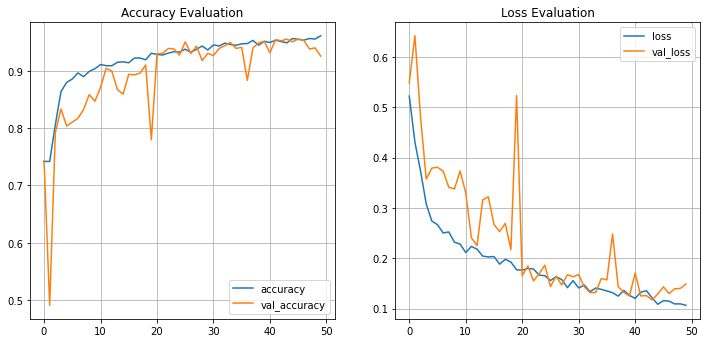

In [26]:
plt.figure(figsize = (12, 12))

plt.subplot(2, 2, 1)
plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")
plt.legend()
plt.grid()
plt.title("Accuracy Evaluation")

plt.subplot(2, 2, 2)
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.grid()
plt.legend()
plt.title("Loss Evaluation")

plt.savefig("pneumonia_model_history.jpg")

# Getting the accuracy for test set

In [27]:
test_accuracy = model.evaluate(validation_generator)
print(test_accuracy)

65/65 [==============================] - 19s 283ms/step - loss: 0.1489 - accuracy: 0.9260
[0.1488603800535202, 0.9259615540504456]


In [28]:
preds = model.predict(validation_generator, verbose=1)
preds

65/65 [==============================] - 19s 282ms/step


array([[9.9717176e-01],
       [4.0480345e-02],
       [1.2826622e-03],
       ...,
       [1.0000000e+00],
       [9.9816692e-01],
       [9.0092944e-05]], dtype=float32)

In [29]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

print(predictions)

[[1.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]
